<a href="https://colab.research.google.com/github/namozhdehi/Springboard/blob/main/Relax_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')
users_df = pd.read_csv('takehome_users.csv', encoding = 'latin-1')

# **2. Data Wrangling**

In [3]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


# **Missing Records**

In [7]:
missing_users = pd.concat([users_df.isnull().sum(), 100 * users_df.isnull().mean()], axis = 1)
missing_users.columns = ['count', '%']
missing_users.sort_values(by = 'count')

,count,%
object_id,0,0.000
creation_time,0,0.000
name,0,0.000
email,0,0.000
creation_source,0,0.000
opted_in_to_mailing_list,0,0.000
enabled_for_marketing_drip,0,0.000
org_id,0,0.000
last_session_creation_time,3177,26.475
invited_by_user_id,5583,46.525


In [8]:
missing_engagement = pd.concat([engagement_df.isnull().sum(), 100 * engagement_df.isnull().mean()], axis = 1)
missing_engagement.columns = ['count', '%']
missing_engagement.sort_values(by = 'count')

,count,%
time_stamp,0,0.0
user_id,0,0.0
visited,0,0.0


# **Duplicate Records**

In [9]:
duplicated_users = users_df[users_df.duplicated()]
duplicated_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [10]:
duplicated_engagement = engagement_df[engagement_df.duplicated()]
duplicated_engagement

,time_stamp,user_id,visited


# **Users & Logins**

In [11]:
len(users_df.object_id.unique())

12000

In [12]:
print('There were {} users and {} total logins'.format(
    engagement_df['user_id'].nunique(), len(engagement_df)
))

There were 8823 users and 207917 total logins


# **Data Types**

In [13]:
dtypes = engagement_df.dtypes
dtypes

,0
time_stamp,object
user_id,int64
visited,int64


In [14]:
users_df['creation_source'].value_counts()

,count
creation_source,
ORG_INVITE,4254
GUEST_INVITE,2163
PERSONAL_PROJECTS,2111
SIGNUP,2087
SIGNUP_GOOGLE_AUTH,1385


# **3. EDA**

In [15]:
missing_users = pd.concat([users_df.isnull().sum(), 100 * users_df.isnull().mean()], axis = 1)
missing_users.columns = ['count', '%']
missing_users.sort_values(by = 'count')

,count,%
object_id,0,0.000
creation_time,0,0.000
name,0,0.000
email,0,0.000
creation_source,0,0.000
opted_in_to_mailing_list,0,0.000
enabled_for_marketing_drip,0,0.000
org_id,0,0.000
last_session_creation_time,3177,26.475
invited_by_user_id,5583,46.525


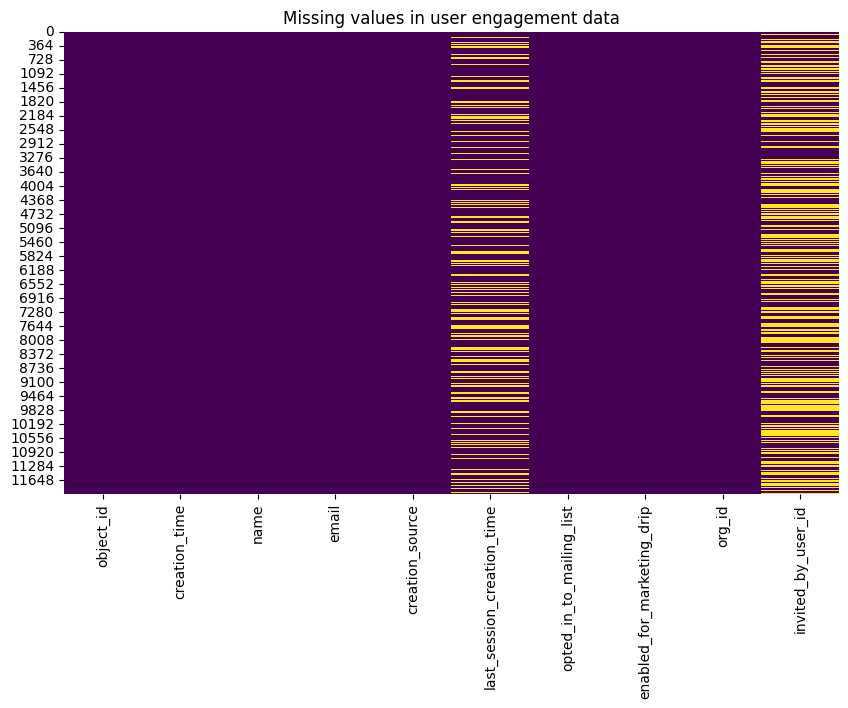

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(users_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values in user engagement data")
plt.show()

# **Handle missing values**

In [17]:
users_df['last_session_creation_time'].fillna(0, inplace=True)
users_df['invited_by_user_id'].fillna(0, inplace=True)

# **Convert time columns to datetime format**

In [18]:
dtypes = users_df.dtypes
dtypes

,0
object_id,int64
creation_time,object
name,object
email,object
creation_source,object
last_session_creation_time,float64
opted_in_to_mailing_list,int64
enabled_for_marketing_drip,int64
org_id,int64
invited_by_user_id,float64


creation_time, last_session_creation_time should have date data type.

In [19]:
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit = 's')

users_df.dtypes

,0
object_id,int64
creation_time,datetime64[ns]
name,object
email,object
creation_source,object
last_session_creation_time,datetime64[ns]
opted_in_to_mailing_list,int64
enabled_for_marketing_drip,int64
org_id,int64
invited_by_user_id,float64


# **Data Visualization**

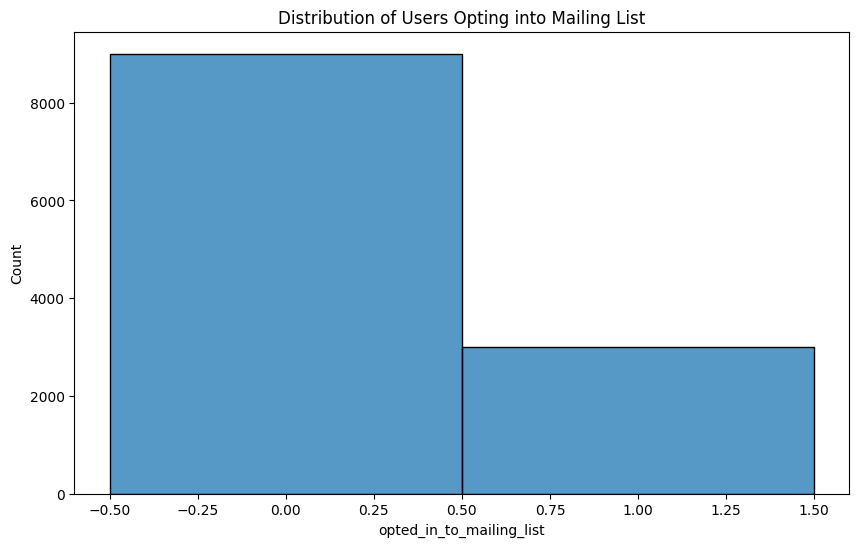

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(users_df['opted_in_to_mailing_list'], kde=False, discrete=True)
plt.title('Distribution of Users Opting into Mailing List')
plt.show()

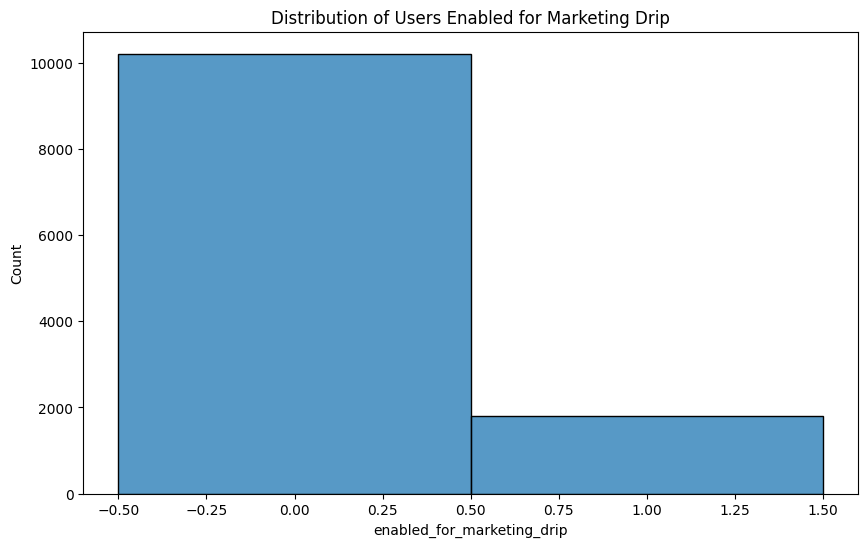

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(users_df['enabled_for_marketing_drip'], kde=False, discrete=True)
plt.title('Distribution of Users Enabled for Marketing Drip')
plt.show()

In [22]:
# Convert timestamp in engagement data to datetime
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

In [23]:
# Define adopted users: logged in 3 times in a 7-day period
adopted_users = (engagement_df.groupby('user_id')
                 .rolling('7D', on='time_stamp')
                 .count()['visited']
                 .groupby(level=0)
                 .max() >= 3).reset_index()

In [24]:
# Rename columns
adopted_users.columns = ['user_id', 'adopted']

In [25]:
# Merge adopted users label into users dataset
users = users_df.merge(adopted_users[['user_id', 'adopted']], how='left', left_on='object_id', right_on='user_id')
users['adopted'].fillna(False, inplace=True)

In [26]:
# Show the final merged dataset
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,False


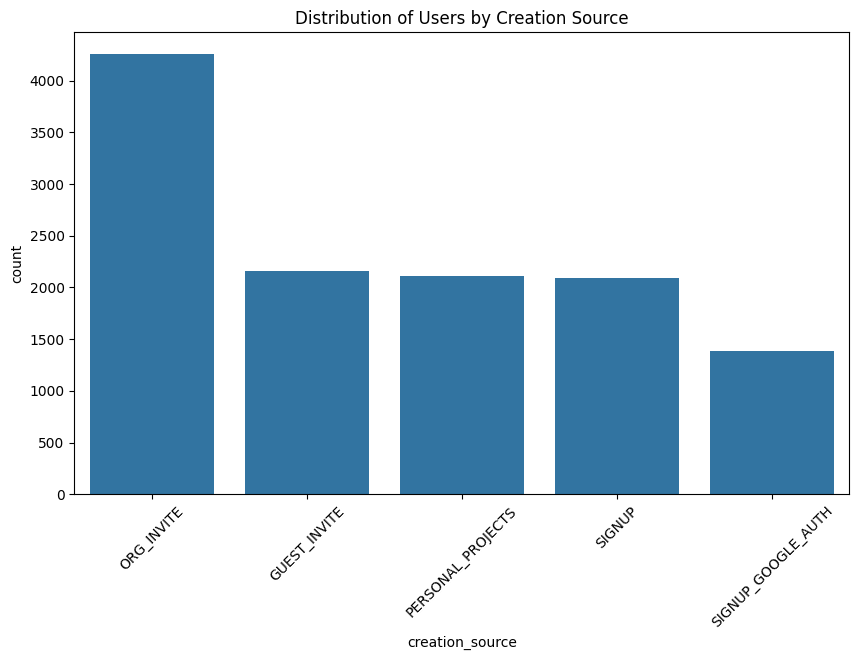

In [27]:
# Distribution of Users by Creation Source
plt.figure(figsize=(10,6))
sns.countplot(data=users, x='creation_source', order=users['creation_source'].value_counts().index)
plt.title('Distribution of Users by Creation Source')
plt.xticks(rotation=45)
plt.show()

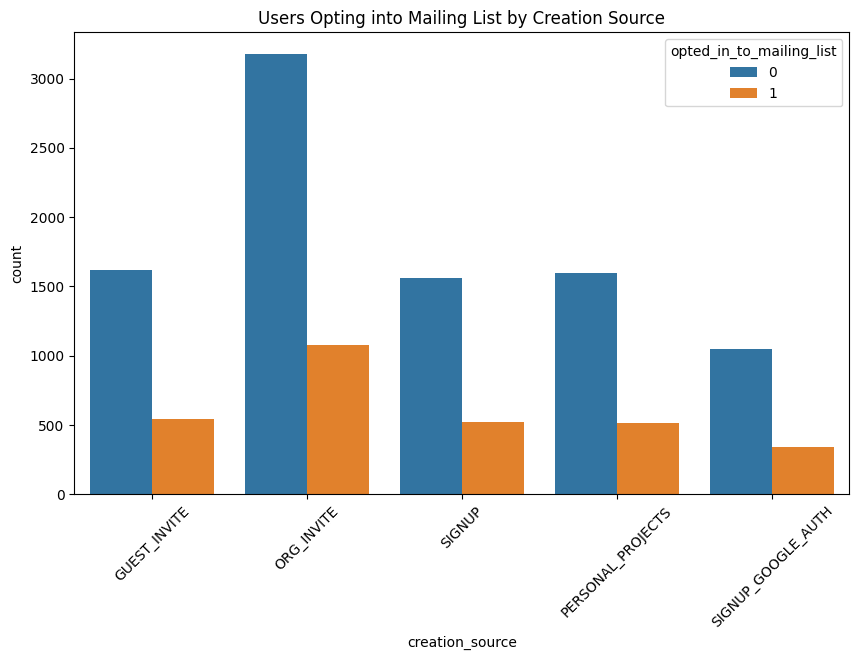

In [28]:
# Users Opting into Mailing List by Creation Source
plt.figure(figsize=(10,6))
sns.countplot(data=users, x='creation_source', hue='opted_in_to_mailing_list')
plt.title('Users Opting into Mailing List by Creation Source')
plt.xticks(rotation=45)
plt.show()

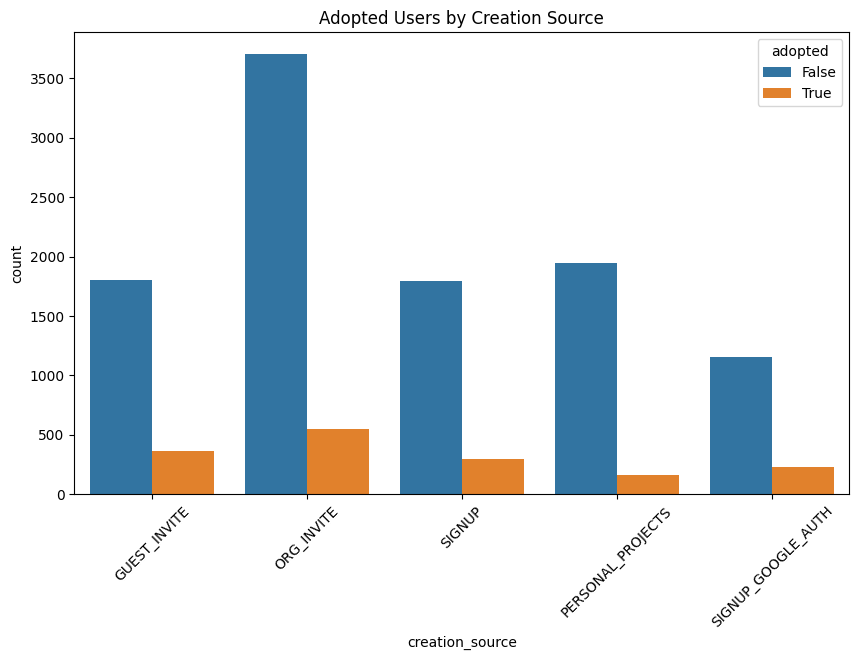

In [29]:
# Adopted Users by Creation Source
plt.figure(figsize=(10,6))
sns.countplot(data=users, x='creation_source', hue='adopted')
plt.title('Adopted Users by Creation Source')
plt.xticks(rotation=45)
plt.show()

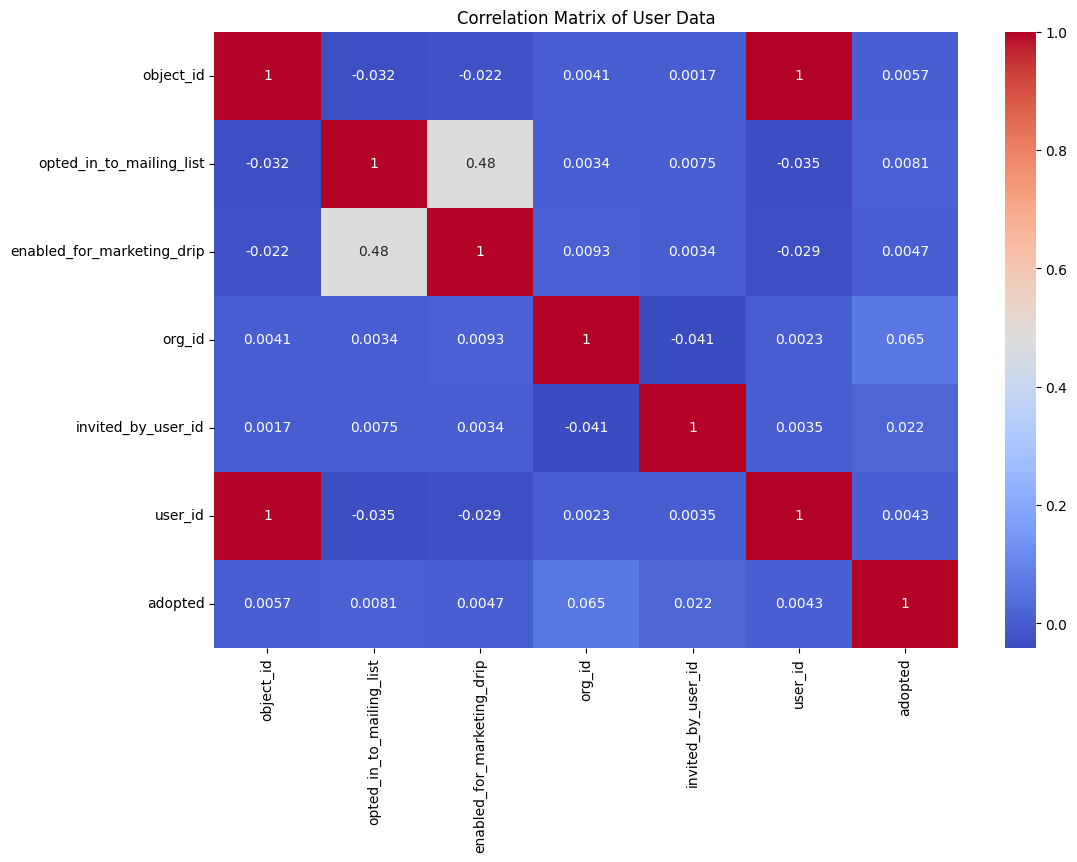

In [30]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(users.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of User Data')
plt.show()

# **Conclusion**

This notebook includes a comprehensive exploratory data analysis (EDA) of the user engagement and adoption datasets. It begins with data wrangling steps, such as handling missing values in critical columns like 'last_session_creation_time' and 'invited_by_user_id' and converting time-related fields into datetime format for a better analysis of user behavior. Additionally, duplicate records are checked, and the distribution of key variables is explored.

The notebook then defines an adopted user as someone who has logged in at least three times within a seven-day period. This new feature is incorporated into the user dataset and analyzed across various factors such as the user's creation source, mailing list opt-ins, and marketing drip enablement. The notebook includes visualizations that show how these factors influence user adoption. Finally, a correlation matrix is provided to uncover relationships between key variables in the dataset, offering insights into user behavior, engagement, and retention strategies.

These steps help lay the groundwork for understanding which factors most strongly correlate with user adoption, guiding future efforts to improve user engagement.